In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest.csv")



In [8]:
df

,_id,Pathogen,ID,Case_status,Pathogen_status,Location_information,Age,Sex_at_birth,Sex_at_birth_other,Gender,...,Travel_history_start,Travel_history_location,Genomics_Metadata,Accession_Number,Source,Source_II,Source_III,Source_IV,Date_entry,Date_last_modified
0,63339f546231dbc49320096e,NaN,NaN,confirmed,NaN,"Non-US Resident, United States",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63339f546231dbc49320096f,NaN,NaN,confirmed,NaN,"Non-US Resident, United States",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63339f546231dbc493200970,NaN,NaN,confirmed,NaN,"Non-US Resident, United States",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,63339f546231dbc493200972,NaN,NaN,confirmed,NaN,"Alabama, United States",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,63339f546231dbc493200973,NaN,NaN,confirmed,NaN,"Alabama, United States",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66817,633472392cea5b5d8da05d8c,NaN,NaN,confirmed,NaN,Venezuela (Bolivarian Republic of),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66818,633472392cea5b5d8da05d8d,NaN,NaN,confirmed,NaN,Venezuela (Bolivarian Republic of),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66819,633472392cea5b5d8da05d8e,NaN,NaN,confirmed,NaN,Venezuela (Bolivarian Republic of),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66820,633472392cea5b5d8da05d8f,NaN,NaN,confirmed,NaN,Venezuela (Bolivarian Republic of),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
entry_data = df['Date_entry']

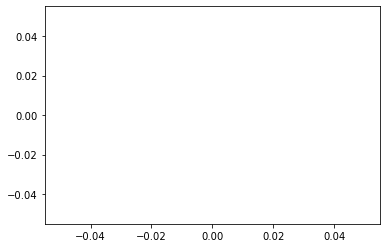

In [3]:
import matplotlib.pyplot as plt
plt.plot(entry_data)

/Users/kootsoop/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6628: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/kootsoop/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6629: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

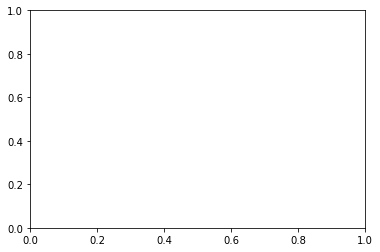

In [4]:
plt.hist(entry_data)

In [5]:
df["Date_entry"] = df["Date_entry"].astype("datetime64")
df.groupby([df["Date_entry"].dt.year, df["Date_entry"].dt.month, df["Date_entry"].dt.day]).count().plot(kind="bar")

ValueError: The 'datetime64' dtype has no unit. Please pass in 'datetime64[ns]' instead.

In [6]:
USA_data = df.loc[df["Country_ISO3"] == "USA"]

KeyError: 'Country_ISO3'

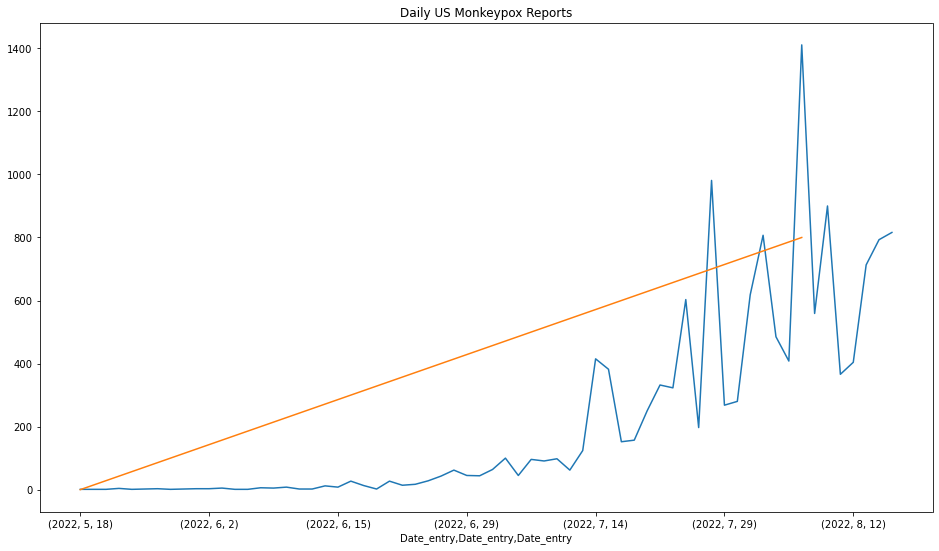

In [7]:
import numpy as np

plt.figure(figsize=(16,9))
counts = USA_data.groupby([USA_data["Date_entry"].dt.year, USA_data["Date_entry"].dt.month, USA_data["Date_entry"].dt.day])["Date_entry"].size()
us_plot = counts.plot(kind="line", title='Daily US Monkeypox Reports')
plt.plot([0,56],[0,800])


# numpy.polyfit(x, numpy.log(y), 1)

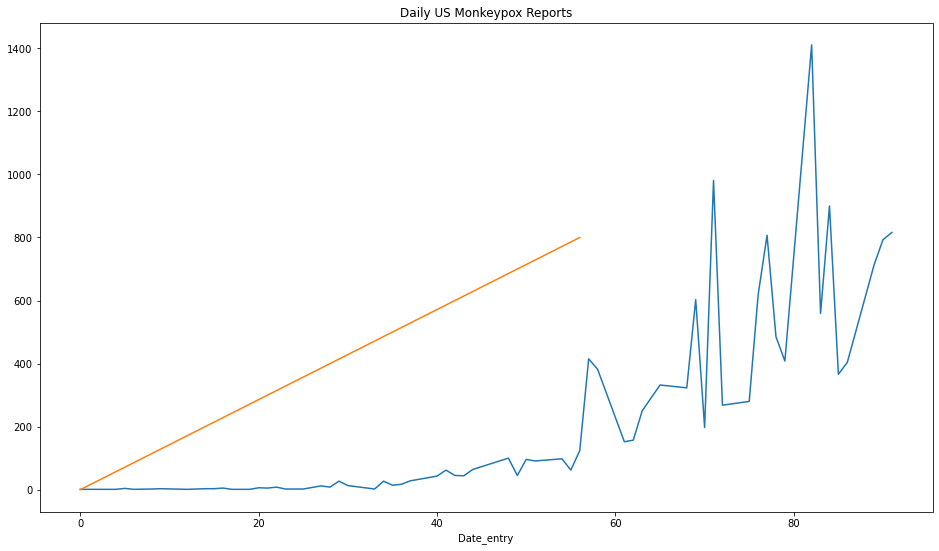

In [8]:
first_day = min(USA_data["Date_entry"].dt.dayofyear)
counts = USA_data.groupby([USA_data["Date_entry"].dt.dayofyear - first_day])["Date_entry"].size()
plt.figure(figsize=(16,9))
us_plot = counts.plot(kind="line", title='Daily US Monkeypox Reports')
plt.plot([0,56],[0,800])


In [9]:
index = counts.index.values.astype(float).astype(float)
values = counts.values.astype(float)
linear_fit_weighted = np.polyfit(index, np.log(values), 1, w=np.sqrt(values))
linear_fit = np.polyfit(index, np.log(values), 1)

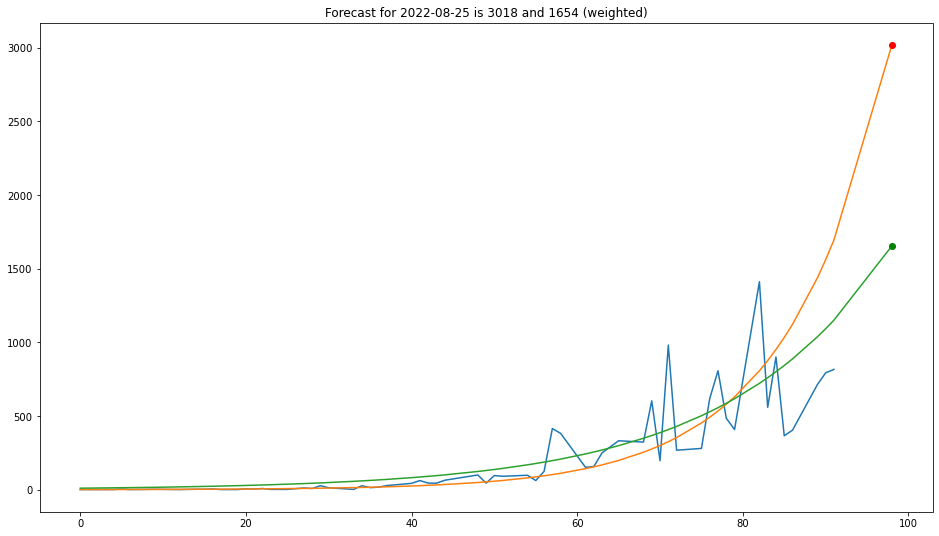

In [10]:
from datetime import datetime, timedelta

seven_days_from_today = datetime.today().date() + timedelta(days=7)

plt.figure(figsize=(16,9))
plt.plot(index, values)
one_week_from_now = np.append(index, max(index)+7.0)
one_week_forecast = np.exp(linear_fit[1])*np.exp(linear_fit[0]*one_week_from_now)
one_week_forecast_weighted = np.exp(linear_fit_weighted[1])*np.exp(linear_fit_weighted[0]*one_week_from_now)
plt.plot(one_week_from_now, one_week_forecast)
plt.plot(one_week_from_now, one_week_forecast_weighted)
plt.title('Forecast for ' + str(seven_days_from_today) + ' is ' + str(int(max(one_week_forecast))) + ' and ' + str(int(max(one_week_forecast_weighted))) + ' (weighted)' )
plt.plot(max(one_week_from_now), max(one_week_forecast), 'ro')
plt.plot(max(one_week_from_now), max(one_week_forecast_weighted), 'go')

In [11]:
from os import path
import json

FORECAST_FILE = 'forecasts_mokeypox.txt'
if (path.exists(FORECAST_FILE)):
    forecast_file = open(FORECAST_FILE, 'r')
    forecasts_mokeypox = json.load(forecast_file)
    forecast_file.close()
else:
    forecasts_mokeypox = {}

if (not str(seven_days_from_today) in forecasts_mokeypox):
    print("Updating file: " + FORECAST_FILE)
    forecasts_mokeypox.update({ str(seven_days_from_today) : str(int(max(one_week_forecast))) + ',' + str(int(max(one_week_forecast_weighted))) })
    forecast_file = open(FORECAST_FILE, 'w+')
    json.dump(forecasts_mokeypox, forecast_file)
    forecast_file.close()
    

Updating file: forecasts_mokeypox.txt


In [15]:
forecast_date = forecasts_mokeypox.keys()
forecasts = forecasts_mokeypox.values()

first_forecasts = [ int(x.split(",")[0])  for x in forecasts]
second_forecasts = [ int(x.split(",")[1])  for x in forecasts]

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

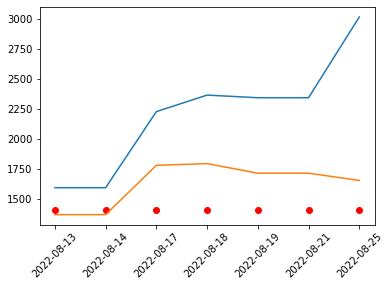

In [17]:
ix = np.argmax(values)
plt.plot(forecast_date, values[ix]*np.ones(len(forecast_date)), 'ro')
plt.plot(forecast_date, first_forecasts)
plt.plot(forecast_date, second_forecasts)
plt.xticks(rotation = 45)

In [14]:
print(forecasts_mokeypox)

{'2022-08-13': '1593,1368', '2022-08-14': '1593,1368', '2022-08-17': '2228,1780', '2022-08-18': '2366,1794', '2022-08-19': '2344,1714', '2022-08-21': '2344,1714', '2022-08-25': '3018,1654'}
